# Conversion Rate#

by Subhankar Halder

## Objective 

In this project, we predict the conversion rate of users visiting a website. Further, based on analysis, we would make recommendations to improve the conversion rate. 

The data has information about users visiting the website. This includes how many users have been converted, total pages visited and the the marketing channel source. [Data Unmasked](https://datamasked.com/) is the source of the data.  

## Import Libraries

We import libraries into Python that will supply us with tools to sort, organize, visualize and analyze data.

In [2]:
# Import numpy and set alias as np
import numpy as np

# Import pandas and set alias as pd
import pandas as pd

# Import pyplot and set alias as plt
from matplotlib import pyplot as plt

# Import seaborn and set alias as sns
import seaborn as sns

# Import module to split data 
from sklearn.model_selection import train_test_split

# Import module for Logistic Regression and Confusion Matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Load Data

We load the csv file and convert the data into a pandas data frame. We print the first few rows of the file.  

In [3]:
# Load Data into data frame
df = pd.read_csv('conversion_data.csv')

# Use head command to print first 10 rows
print(df.head(10))

  country  age  new_user  source  total_pages_visited  converted
0      UK   25         1     Ads                    1          0
1      US   23         1     Seo                    5          0
2      US   28         1     Seo                    4          0
3   China   39         1     Seo                    5          0
4      US   30         1     Seo                    6          0
5      US   31         0     Seo                    1          0
6   China   27         1     Seo                    4          0
7      US   23         0     Ads                    4          0
8      UK   29         0  Direct                    4          0
9      US   25         0     Ads                    2          0


## Data Cleaning and Exploration

In this section we explore and clean the data if required.  

In [4]:
# Print information about the data frame
df.info()

# Print basic statistics about the data frame
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


### Observations

A major issue that comes up when we look at the data is that max age is 123. We explore the age column. 

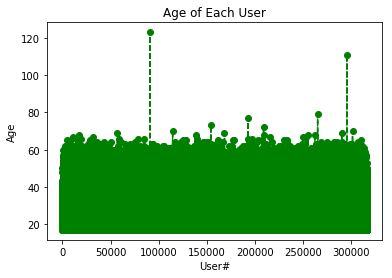

In [5]:
# Create a list of 316200 elements to serve as the x axis for the line plot of age
l = range(316200)

# Create plot for age
plt.plot(l,df['age'],linestyle = '--',marker='o', color = 'green')
plt.xlabel('User#')
plt.ylabel('Age')
plt.title('Age of Each User')
plt.show()


It seems there are only two outliers. We confirm this assertion and remove the two data points.  

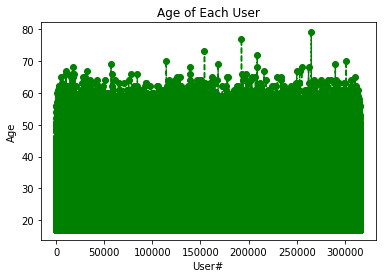

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


In [6]:
# Check dataframe index that has the outlier age
df[df['age']>100]

# Drop the respective rows from the dataframe
indexNames = df[ df['age'] > 100 ].index
df.drop(indexNames , inplace=True)

# Check graphically if the outlier has been deleted
l = range(316198)
plt.plot(l,df['age'],linestyle = '--',marker='o', color = 'green')
plt.xlabel('User#')
plt.ylabel('Age')
plt.title('Age of Each User')
plt.show()

# Check analytically if the outlier has been deleted
df.info()
df.describe()


For the quantitative total_pages_visited we plot a distribution chart. 

Text(0.5, 1.0, 'Total Pages Visited')

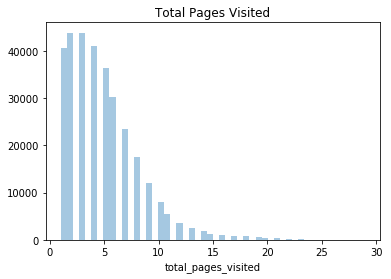

In [7]:
# Distribution Plot for Total Pages Visited
sns.distplot(df['total_pages_visited'], kde = False)
plt.title('Total Pages Visited')

We note that plot seems normal but right skewed. We now explore the number of users per country and their conversion rate. 

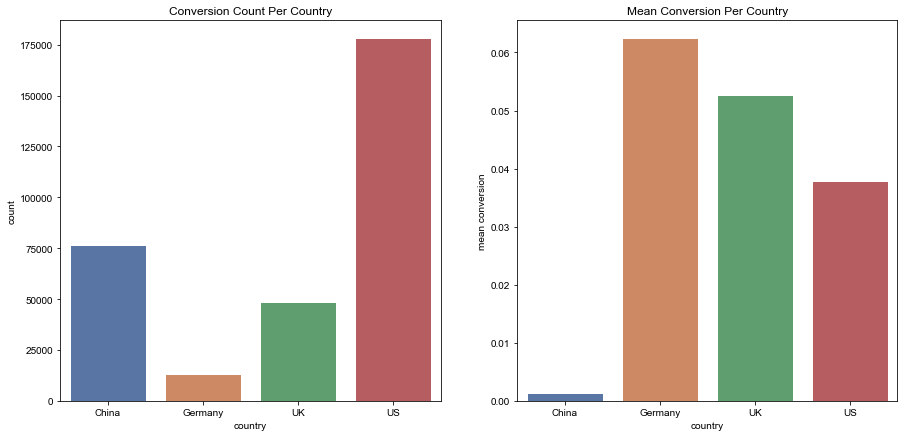

In [8]:
# Initiate 2 subplots to plot conversions per country and the mean conversion per country
fig, ax = plt.subplots(figsize=(15,7), ncols=2, nrows=1)

# Specify title and size specifications
y_title_margin = 1
ax[0].set_title('Conversion Count Per Country', y = y_title_margin)
ax[1].set_title('Mean Conversion Per Country', y = y_title_margin)

# Plots the number of users from a specific country
sns.set(style = 'darkgrid')
df = df.sort_values('country').reset_index()

sns.countplot(data = df, x = "country",ax = ax[0])

# Calculate the mean conversion per country
country_conversion = df.groupby('country').converted.mean().reset_index()
country_conversion = country_conversion.rename(columns = {"converted":"mean conversion"})

# Plot barplot of the mean conversion per country
sns.barplot(data = country_conversion, x = "country", y = "mean conversion",ax=ax[1])


### Observations

* China has the lowest mean conversion although it sends a high amount of users
* Germany has the highet mean conversion although it sens the lowerest number of users
* Both UK and Germany have a higher mean conversion than US 
* US has the highest amount of users

Now, we would explore the conversion data and compare it with age. 

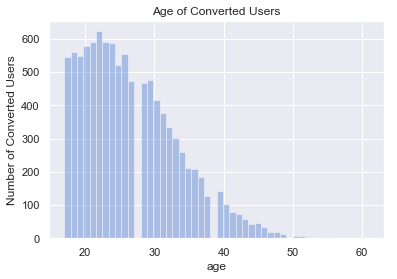

In [9]:
# Create a dataframe that consists of only the converted users
age_conversion  = df [df.converted == 1].reset_index()

# Plot a histogram for age of those converted users 
plt.figure()
plt.title('Age of Converted Users')
plt.xlabel('Age')
plt.ylabel('Number of Converted Users')

sns.set(style="white", palette="muted", color_codes=True)
sns.distplot(age_conversion['age'], color = "b", kde=False)
plt.show()

### Observations

* 20-30 bracket is the age for most converted users.


We now explore the country-wide age and converted users relationship. 



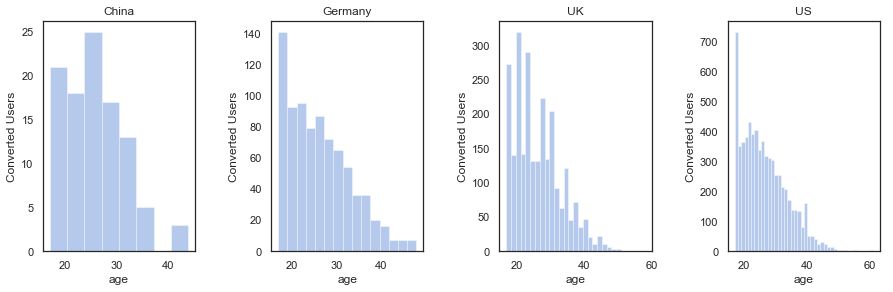

In [10]:
# Initiate 4 subplots to plot conversions per country and the age
fig, ax = plt.subplots(figsize=(15,4), ncols=4, nrows=1)

# Assign values for spacing between graphs
left   =  0.125  
right  =  0.9    
bottom =  0.1    
top    =  0.9    
wspace =  .5     
hspace =  1.1    

# This function adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# Specify title and size specifications
y_title_margin = 1
ax[0].set_title('China', y = y_title_margin)
ax[1].set_title('Germany', y = y_title_margin)
ax[2].set_title('UK', y = y_title_margin)
ax[3].set_title('US', y = y_title_margin)


# Create dataframe that consists of country specific converted users
china_conversion = age_conversion[age_conversion.country == 'China']
germany_conversion = age_conversion[age_conversion.country == 'Germany']
uk_conversion = age_conversion[age_conversion.country == 'UK']
us_conversion  = age_conversion[(age_conversion.country == 'US')]

# Set ylabel
ax[0].set(ylabel = 'Converted Users')
ax[1].set(ylabel = 'Converted Users')
ax[2].set(ylabel = 'Converted Users')
ax[3].set(ylabel = 'Converted Users')



# Plot Country specific ages of users that have converted
sns.distplot(china_conversion['age'], kde = False, ax=ax[0])
sns.distplot(germany_conversion['age'],kde = False, ax = ax[1])
sns.distplot(uk_conversion['age'],kde=False, ax= ax[2])
sns.distplot(us_conversion['age'],kde=False, ax = ax[3])



### Observations

* Converted users from Germany, UK and US have more older users (more that 40) than China
* Converted users from Germany has a steady decrease by age. This trend is also seen in US post age 30. 
* Conversion in UK seem agnostic to age in the group 20-35. This, however, needs to be statistically confirmed. 

We now explore the data with regards to the channel source of the users 

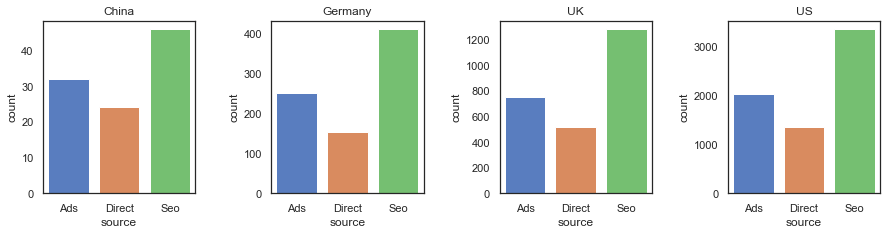

In [11]:


# Initiate 4 subplots to plot conversions per country and the source of the users
fig, ax = plt.subplots(figsize=(15,3), ncols=4, nrows=1)

# Assign values for spacing between graphs
left   =  0.125  
right  =  0.9    
bottom =  0.1    
top    =  0.9    
wspace =  .5     
hspace =  1.1    

# This function adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# Specify title and size specifications
y_title_margin = 1
ax[0].set_title('China', y = y_title_margin)
ax[1].set_title('Germany', y = y_title_margin)
ax[2].set_title('UK', y = y_title_margin)
ax[3].set_title('US', y = y_title_margin)

# Sort source alphabetically so that the graphs when plotted follow the same format
china_conversion = china_conversion.sort_values('source')
germany_conversion = germany_conversion.sort_values('source')
uk_conversion = uk_conversion.sort_values('source')
us_conversion = us_conversion.sort_values('source')



# Plot graphs of the source of the converted users per country

sns.countplot(data = china_conversion, x = "source",ax = ax[0])
sns.countplot(data = germany_conversion, x = "source",ax = ax[1])
sns.countplot(data = uk_conversion, x = "source",ax = ax[2])
sns.countplot(data = us_conversion, x = "source",ax = ax[3])




### Observations

* For all four countries SEO is the biggest source, followed by Ads and Direct Source

Now, we explore the data relationship with converted users and the number of webpages visited during the conversion session. 

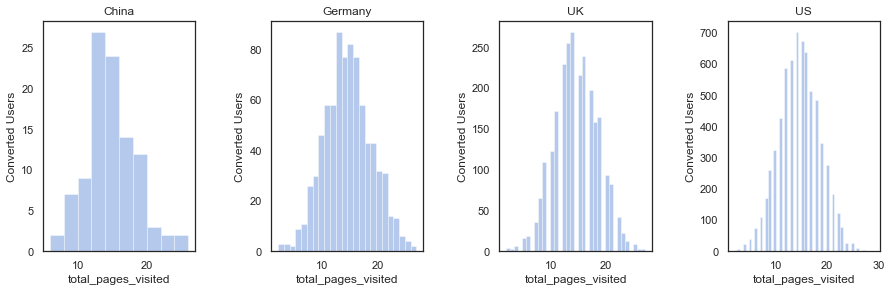

In [12]:
# Initiate 4 subplots to plot conversions per country and the number of webpages visited
fig, ax = plt.subplots(figsize=(15,4), ncols=4, nrows=1)

# Assign values for spacing between graphs
left   =  0.125  
right  =  0.9    
bottom =  0.1    
top    =  0.9    
wspace =  .5     
hspace =  1.1    

# This function adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# Specify title and size specifications
y_title_margin = 1
ax[0].set_title('China', y = y_title_margin)
ax[1].set_title('Germany', y = y_title_margin)
ax[2].set_title('UK', y = y_title_margin)
ax[3].set_title('US', y = y_title_margin)



# Set ylabel
ax[0].set(ylabel = 'Converted Users')
ax[1].set(ylabel = 'Converted Users')
ax[2].set(ylabel = 'Converted Users')
ax[3].set(ylabel = 'Converted Users')



# Plot Country specific ages of users that have converted
sns.distplot(china_conversion['total_pages_visited'], kde = False, ax=ax[0])
sns.distplot(germany_conversion['total_pages_visited'],kde = False, ax = ax[1])
sns.distplot(uk_conversion['total_pages_visited'],kde = False, ax= ax[2])
sns.distplot(us_conversion['total_pages_visited'],kde = False, ax = ax[3])



### Observations

* For all 4 countries the total pages visited by the converted users seem to follow a normal curve.
* 15 pages seem to be the ideal number where we have most converted users.
* It is not true that converted users have visited the most number of pages. Post 15 pages, the number of converted users have dropped. 

We now compare the new users who have converted in their first session of visiting the website. The column new_user with a score 1 reflects a new user to the website.

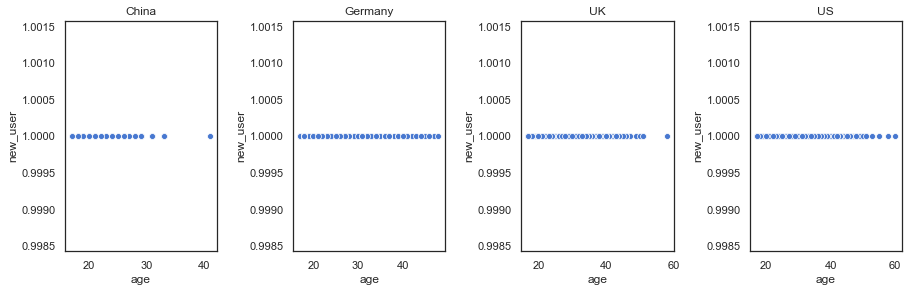

In [13]:
# Initiate 4 subplots to plot conversions in the first session of visiting the website (new_user)
fig, ax = plt.subplots(figsize=(15,4), ncols=4, nrows=1)

# Assign values for spacing between graphs
left   =  0.125  
right  =  0.9    
bottom =  0.1    
top    =  0.9    
wspace =  .5     
hspace =  1.1    

# This function adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
   right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# Specify title and size specifications
y_title_margin = 1
ax[0].set_title('China', y = y_title_margin)
ax[1].set_title('Germany', y = y_title_margin)
ax[2].set_title('UK', y = y_title_margin)
ax[3].set_title('US', y = y_title_margin)



# Set ylabel and x_label
ax[0].set(ylabel = 'New Users')
ax[1].set(ylabel = 'New Users')
ax[2].set(ylabel = 'New Users')
ax[3].set(ylabel = 'New Users')


# Create a dataframe that has all the new user to the website per country
china_new = china_conversion[china_conversion.new_user == 1]
germany_new = germany_conversion[germany_conversion.new_user == 1]
uk_new = uk_conversion[uk_conversion.new_user == 1]
us_new = us_conversion[us_conversion.new_user == 1]




# Plot Country specific ages of new users that have converted 
sns.scatterplot(x = "age", y= "new_user", data = china_new, ax=ax[0])
sns.scatterplot(x = "age", y= "new_user", data = germany_new, ax = ax[1])
sns.scatterplot(x = "age", y= "new_user", data = uk_new, ax = ax[2])
sns.scatterplot(x = "age", y= "new_user", data = us_new, ax = ax[3])



### Observations

* Most young users in China are new users who convert
* In Germany, we seem to have a uniform conversion across the entire age group
* In UK and US new users who are older seem less than the young users

## Machine Learning

To predict the conversion of users for the website, we use the Logistic Regression. We note that prediction is a classification problem - whether a user converts or not. Logistic Regression is low on flexibility but high on interpretability. Logistic Regression is also low on Bias. Thus, we choose logistic regression for this problem. 

To proceed towards this algorithm, we will convert the categorical variables into quantitative by the encoding process. 

In [14]:
# Use One Hot Encoding to make a new dataframe that consists of only quantitative variables
X = pd.get_dummies(df, prefix_sep='_', drop_first=False)
# Check the new dataframe
X.head()

,index,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,217850,31,1,13,0,1,0,0,0,1,0,0
1,161431,22,1,6,0,1,0,0,0,0,0,1
2,53181,27,0,1,0,1,0,0,0,1,0,0
3,228849,34,1,5,0,1,0,0,0,0,0,1
4,53179,37,0,1,0,1,0,0,0,1,0,0


We prepare training and test data 

In [15]:
# We splite the data set into training and test data. 
#We select 80% of the data to be training and keep the rest 20% for testing

train, test = train_test_split(X, test_size=0.2)


# Check Results
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252958 entries, 62947 to 61008
Data columns (total 12 columns):
index                  252958 non-null int64
age                    252958 non-null int64
new_user               252958 non-null int64
total_pages_visited    252958 non-null int64
converted              252958 non-null int64
country_China          252958 non-null uint8
country_Germany        252958 non-null uint8
country_UK             252958 non-null uint8
country_US             252958 non-null uint8
source_Ads             252958 non-null uint8
source_Direct          252958 non-null uint8
source_Seo             252958 non-null uint8
dtypes: int64(5), uint8(7)
memory usage: 13.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63240 entries, 231853 to 313826
Data columns (total 12 columns):
index                  63240 non-null int64
age                    63240 non-null int64
new_user               63240 non-null int64
total_pages_visited    63240 non-null int64
conver

In [16]:
# Prepare the training data

X_train = train[['age', 'new_user', 'total_pages_visited','country_China', 'country_Germany', 'country_UK','country_US','source_Ads','source_Direct','source_Seo']]
y_train = train[['converted']] 

# Prepare the test data
X_test = test[['age', 'new_user', 'total_pages_visited','country_China', 'country_Germany', 'country_UK','country_US','source_Ads','source_Direct','source_Seo']]
y_test = test[['converted']] 

# Train the Logistic Regression Model
classifier = LogisticRegression(solver = 'lbfgs', max_iter=1000)
classifier.fit(X_train, y_train.values.ravel())

# Predict the test set results and create confusion matrix
y_pred = classifier.predict(X_test)

y_test = y_test.to_numpy()
#type(y_pred)
#type(y_test)
#confusion_matrix(y_test, y_pred, labels=["Converted Test", "Converted Predicted"])

In [20]:
#y_test = y_test.to_numpy()

y_test.shape
y_pred.shape

#confusion_matrix(y_test, y_pred, labels=["Converted Test", "Converted Predicted"])

(63240,)

## Conclusion

We note that the site is doing well with the German audience and the young. The company should investigate why the website is doing bad in China. Further, for future research, we can investigate the data using Random Forest and Decision Trees to compare with the Logistic Regression results.  